# Homework 2

In [3]:
#imports

import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
from scipy.optimize import fsolve   
from scipy.optimize import minimize

initial fin guess: 54698600000.0
freq bin of decimated initial giess is: 497.40982857151647
Fin solution is: [5.46987179e+10]
at which the value of the expression is: [-1.08398126e-08]
value of the expression at initial fin guess is -13.512133253974298
Normalized Fa estimation is: [0.48838141]
Normalized FaD estimation is: [0.48838141]
Freq bin of decimated signal is: [500.1025641]
Adjusted fin = [5.89166651e+10]
Freq bin of decimated signal is: [485.3689064]
Adjusted normalized Fa = [0.47395835]
Adjusted normalized FaD = [0.47399307]
Adjuted Normalized FaD from PSD is: 0.47363281250000006
Frequency bin of decimated Fa from PSD is: 485


C:\Users\Owner\AppData\Local\Temp\ipykernel_12472\377887839.py:55: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  Fin_adjusted = fsolve(func_adjusted, Fin_initial_guess)


Text(0.5, 0, 'Normalized Discrete Frequency')

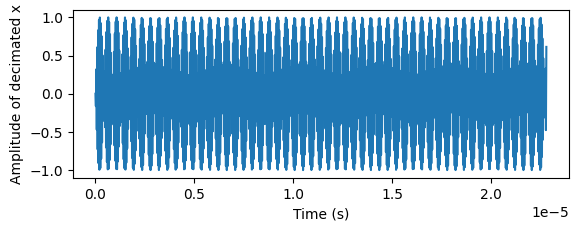

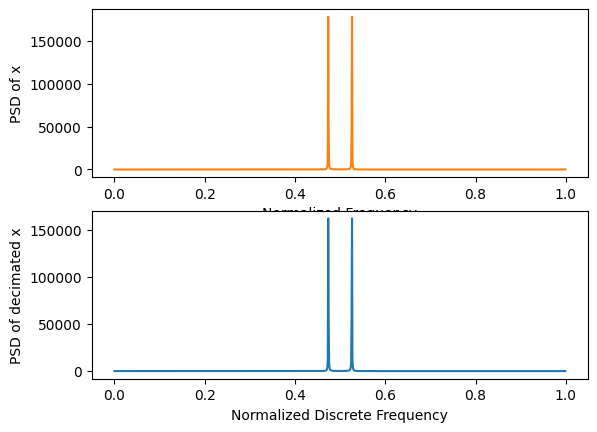

In [24]:
#parameters from class

Fs=112e9
M=2**10
DF=2497
Fin_initial_guess = 54.6986e9
print("initial fin guess:", Fin_initial_guess)
FsD=Fs/DF
R1D=np.round(Fin_initial_guess/FsD)
FaD=abs(Fin_initial_guess-R1D*FsD)
kD = (FsD/2-FaD)*M/FsD
FbinD=M//2-kD
print("freq bin of decimated initial giess is:", FbinD)

def func(Fin):
    return DF - abs((Fin-np.round(Fin/Fs)*Fs)/(Fin-np.round(Fin/FsD)*FsD))

Fin_solution = fsolve(func, Fin_initial_guess)
print("Fin solution is:", Fin_solution)
print("at which the value of the expression is:", func(Fin_solution))
print("value of the expression at initial fin guess is", func(Fin_initial_guess))

Fin=Fin_solution

CDestimate=DF*Fin*M/Fs

R1=np.round(Fin/Fs)
R2=np.round(2*Fin/Fs)
R3=np.round(3*Fin/Fs)

Fa = abs(Fin-R1*Fs)
FaN = Fa/Fs
print("Normalized Fa estimation is:", FaN)

FH2=abs(2*Fin-R2*Fs)
FH3=abs(3*Fin-R3*Fs)
FsD=Fs/DF

R1D=np.round(Fin/FsD)
R2D=np.round(2*Fin/FsD)
R3D=np.round(3*Fin/FsD)

FaD=abs(Fin-R1D*FsD)
print("Normalized FaD estimation is:", FaD/FsD)

kD = (FsD/2-FaD)*M/FsD
FbinD=M//2-kD
print("Freq bin of decimated signal is:", FbinD)
FaD_target=FaD/FsD *np.round(kD)*FsD/M
Fin_initial_guess = Fin

def func_adjusted(Fin_adjusted):
    return DF - abs((Fin_adjusted - np.round(Fin_adjusted/Fs)*Fs)/(Fin_adjusted - np.round(Fin_adjusted/FsD)*FsD)) + 1e6*abs(FaD_target-(Fin_adjusted - np.round(Fin_adjusted)))

Fin_adjusted = fsolve(func_adjusted, Fin_initial_guess)
Fin=Fin_adjusted
R1=np.round(Fin/Fs)
Fa_adjusted=abs(Fin-R1*Fs)
FaN_adjusted=Fa_adjusted/Fs

print("Adjusted fin =", Fin)

R1D_adjusted=np.round(Fin/FsD)
FaD_adjusted=abs(Fin-R1D_adjusted*FsD)
kD=(FsD/2-FaD_adjusted)*M/FsD
FbinD_adjusted=M//2-kD
print("Freq bin of decimated signal is:", FbinD_adjusted)

print("Adjusted normalized Fa =", FaN_adjusted)
print("Adjusted normalized FaD =", FaD_adjusted/FsD)

FaD=FaD_adjusted
FaDN=FaD/FsD
FH2D=abs(2*Fin-R2D*FsD)
FH3D=abs(3*Fin-R3D*FsD)

trange=np.arange(0,M/Fs,1/Fs)
x=np.sin(2*np.pi*Fin*trange)
plt.subplot(211)
plt.plot(trange,x)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
PSDX=abs(fft(x))**2
max_index=np.argmax(PSDX[0:M//2])
frange=np.arange(0,Fs,Fs/M)
FaNPSD=frange[max_index]/Fs
plt.figure(1)
plt.subplot(211)
plt.plot(frange/Fs,PSDX)
plt.ylabel("PSD of x")
plt.xlabel("Normalized Frequency")
trangeD=np.arange(0,M/FsD,1/FsD)
xD=np.sin(2*np.pi*Fin*trangeD)
plt.figure(2)
plt.subplot(212)
plt.plot(trangeD,xD)
plt.ylabel("Amplitude of decimated x")
plt.xlabel("Time (s)")
PSDXD=abs(fft(xD))**2
max_index=np.argmax(PSDXD[0:M//2])
frangeD=np.arange(0,FsD,FsD/M)
FaNPSD=frangeD[max_index]/FsD
print("Adjuted Normalized FaD from PSD is:", FaNPSD)
print("Frequency bin of decimated Fa from PSD is:", max_index)
plt.figure(1)
plt.subplot(212)
plt.plot(frangeD/FsD,PSDXD)
plt.ylabel("PSD of decimated x")
plt.xlabel("Normalized Discrete Frequency")